# ACTIVIDAD 3.3 HDSP
##          Valeria Cruz Tamayo (202122)
## Análisis de datos Covid-19

Para esta actividad se tomó el dataser de Johns Hopkins University Center for Systems Science and Engineering (CSSE) disponible en la liga https://github.com/CSSEGISandData/COVID-19

Para realizar este análisis, primero se corrieron los prgramas especificados en la liga anterior y luego se importaron las librerías necesarias y el datset pre-procesado por los programas de JHU CSSE:


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [5]:
cv19_ds=pd.read_csv('data/time-series-19-covid-combined.csv')

Posteriormente se realizó un análisis inicial de el dataset para conocer sus atributos, tamaño, etc.

In [6]:
n_obs = cv19_ds.shape[0]
n_atrib = cv19_ds.shape[1]
print('este dataset contiene {0} observaciones y {1} atributos'.format(n_obs,n_atrib))

este dataset contiene 114258 observaciones y 6 atributos


In [7]:
atributes = cv19_ds.columns
print('los atributos incluyen: ')
for atr in atributes:
    print(atr)


los atributos incluyen: 
Date
Country/Region
Province/State
Confirmed
Recovered
Deaths


In [8]:
countries = pd.Categorical(cv19_ds["Country/Region"])
n_countries = countries.categories.size
fechas = pd.Categorical(cv19_ds["Date"])
n_fechas = fechas.categories.size
fecha_ini = fechas.categories[0]
fecha_fin = fechas.categories[n_fechas-1]
print('Hay {0} países en la base de datos y eventos en {1} fechas desde el {2} hasta el {3}'.format(n_countries,n_fechas,fecha_ini,fecha_fin))

Hay 192 países en la base de datos y eventos en 417 fechas desde el 2020-01-22 hasta el 2021-03-13


Luego se decidió realizar un análisis exploratorio más a detalle de los datos para Latinoamérica en el 2021:

In [9]:
latam_p = ["Argentina","Bolivia","Brazil","Chile","Colombia","Cuba","Dominican Republic","Ecuador","El Salvador","Grenada","Guatemala","Guyana","Haiti","Honduras","Jamaica","Mexico","Nicaragua","Panama","Paraguay","Peru","Uruguay","Venezuela"]
latam_ds = cv19_ds[cv19_ds['Country/Region'].isin(latam_p)]
#print(latam_ds)


In [10]:
latam2021_ds = latam_ds[latam_ds['Date']>='2021-01-01']
latam2021_ds['Date'].astype('datetime64') # cambiar el formato de la columna a datetime64
#print(latam2021_ds)


2847     2021-01-01
2848     2021-01-02
2849     2021-01-03
2850     2021-01-04
2851     2021-01-05
            ...    
112168   2021-03-09
112169   2021-03-10
112170   2021-03-11
112171   2021-03-12
112172   2021-03-13
Name: Date, Length: 1584, dtype: datetime64[ns]

Los datos analizados fueron la cantidad de casos confirmados, de muertes y de casos de recuperación.

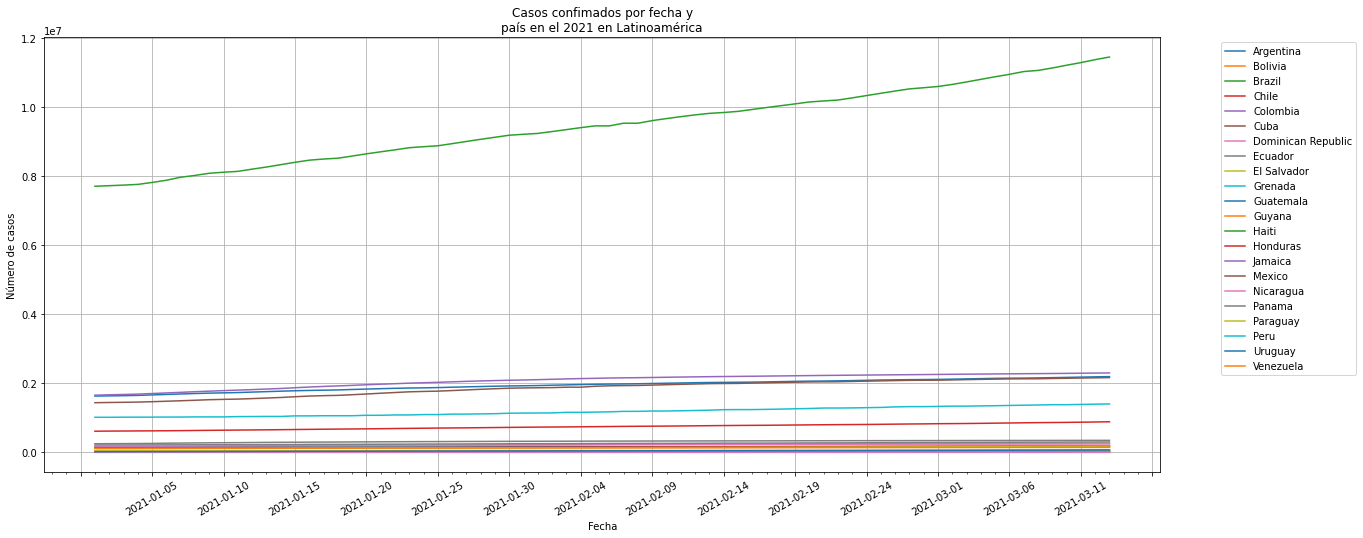

In [11]:
latam21_data = latam2021_ds.groupby("Country/Region")
#for latam_c in latam_data:
    #print(latam_c)
plt.figure(figsize=(20,8))
for fecha, pais in latam21_data:
   plt.plot(pais["Date"], pais["Confirmed"], label=fecha)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Casos confimados por fecha y\npaís en el 2021 en Latinoamérica')
plt.xlabel('Fecha')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5)) # Ver eje cada 5 días
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=30)
plt.ylabel('Número de casos')
plt.grid()

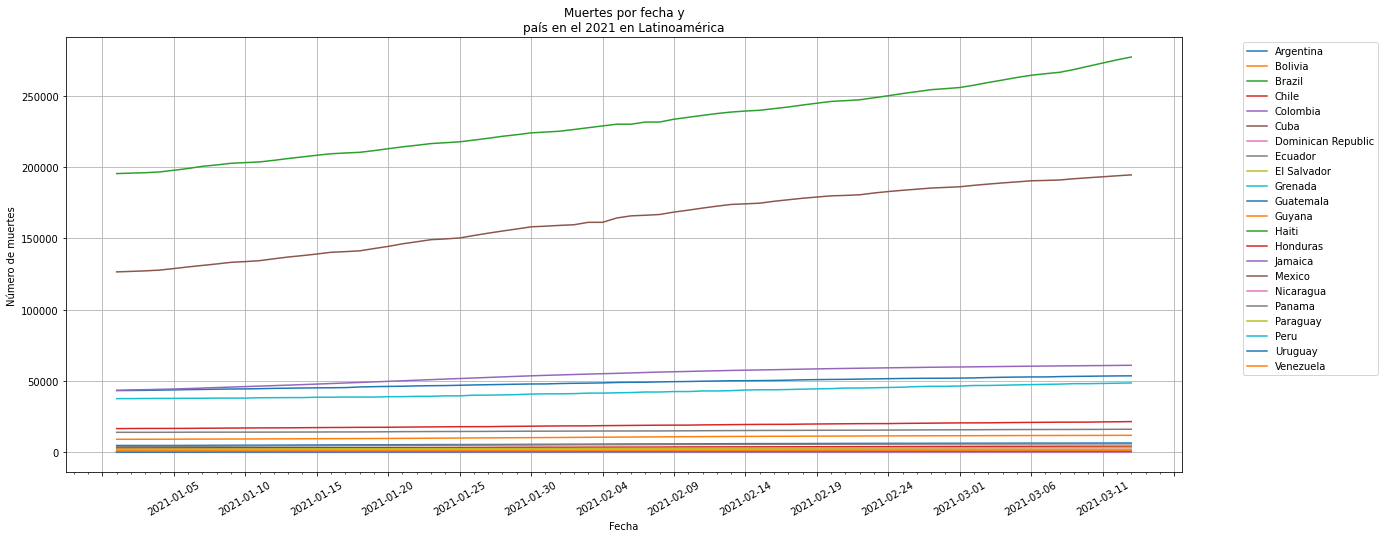

In [12]:
plt.figure(figsize=(20,8))
for fecha, pais in latam21_data:
   plt.plot(pais["Date"], pais["Deaths"], label=fecha)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Muertes por fecha y\npaís en el 2021 en Latinoamérica')
plt.xlabel('Fecha')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=30)
plt.ylabel('Número de muertes')
plt.grid()

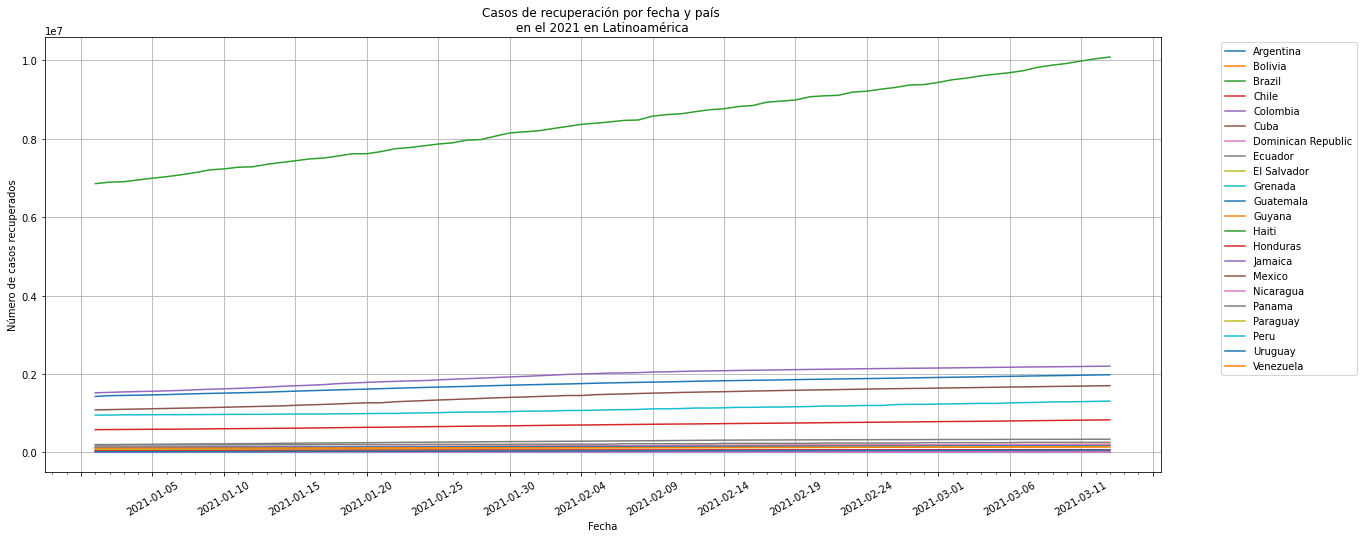

In [13]:
plt.figure(figsize=(20,8))
for fecha, pais in latam21_data:
   plt.plot(pais["Date"], pais["Recovered"], label=fecha)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Casos de recuperación por fecha y país \nen el 2021 en Latinoamérica')
plt.xlabel('Fecha')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
plt.xticks(rotation=30)
plt.ylabel('Número de casos recuperados')
plt.grid()

Asimismo, se realizó una gráfica de barras para comparar los casos confirmados con las muertes en el 2021 en Latinoamérica.

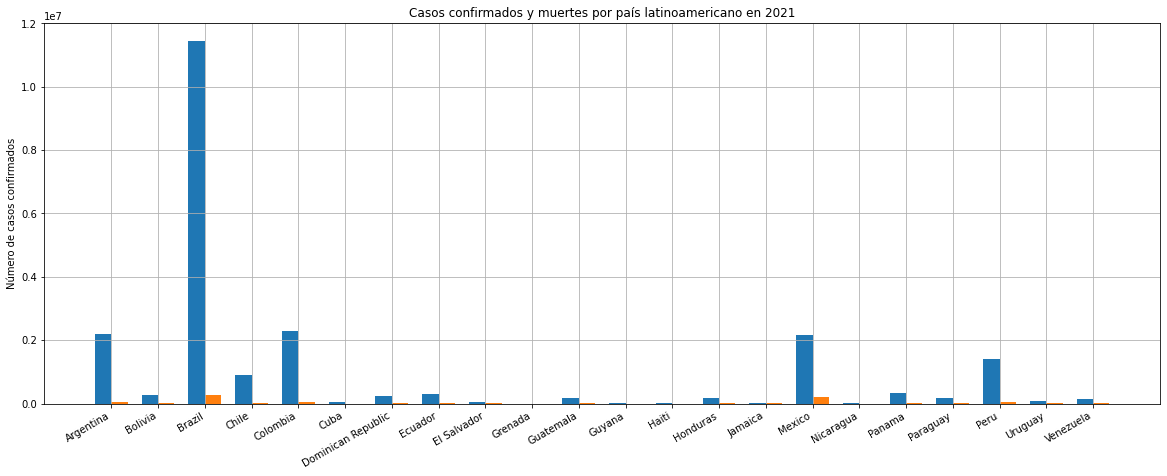

In [14]:
conf_latam = latam21_data["Confirmed"].max() #obtener únicamente los máximos (son acumulados)
muer_latam = latam21_data["Deaths"].max()
#print(conf_latam)
conf_latam = conf_latam.to_numpy()
muer_latam = muer_latam.to_numpy()
x = np.arange(len(conf_latam))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(x - width/2, conf_latam, width, label=latam_p)
ax.bar(x + width/2, muer_latam, width, label=latam_p)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Número de casos confirmados')
ax.set_title('Casos confirmados y muertes por país latinoamericano en 2021')
ax.set_xticks(x)
ax.set_xticklabels(latam_p)
plt.setp(ax.get_xticklabels(),rotation=30,ha='right')


plt.grid()
   

Como se puede ver en las 4 gráficas, Brasil tiene un predominante número de casos confirmados, aunque si analizamos las muertes México podría superarlo en porcentaje, pues aunque tiene un menor número de muertes, la cantidad de muertes en relación al número de casos confirmados es mayor para México que para Brasil.

## Finalmente, se pide realizar un mapa mundial con diferentes datos por país.

Para esto, se realizó el mismo análisis de Casos confimados, Muertes y Recuperaciones pero para todos los países y el acumulado total de la base de datos (no solo para 2021). 

Primero, se importaron las librerías necesarias:

In [15]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

Posteriormente, se definió una función para obtener los códigos de cada país y su respectivo continente.

In [16]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

Se llamó a la función para cada ubicación de la base de datos y se agregaron estos códigos al Data Frame.

In [17]:
locations = cv19_ds["Country/Region"]
Code = list(range(len(locations)))
for loc in Code:
    #print(loc)
    Code[loc] = get_continent(locations[loc])

cv19_ds2 = cv19_ds # copy dataset
Code = pd.DataFrame(Code, columns=['Country','Continent'])
#print(Code)
cv19_ds2 = pd.concat([cv19_ds2,Code],axis=1)
#print(cv19_ds2)


Se definió una nueva función para obtener las latitudes y longitude de las ubicación con base en los códigos de país.

In [18]:
geolocator = Nominatim(user_agent="My User Agent 1.0 valeriaspam1@gmail.com")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

Se redujo el Data Frame a únicamente el máximo valor por país para no tener que invocar a la función tantas veces.

In [19]:
byChars = pd.DataFrame(cv19_ds2, columns=['Country','Confirmed','Deaths','Recovered'])
#print(byChars)
byCountry = byChars.groupby(["Country"],axis=0).max(['Confirmed','Deaths','Recovered'])
byCountry = pd.DataFrame(byCountry, columns=['Confirmed','Deaths','Recovered'])
countries2 = list(byCountry.index)
#byCountry = pd.concat([countries2,byCountry],axis=1)
#print(byCountry)
#print(countries2)

Y luego se obtuvo la latitud y longitud con la función previamente definida.

In [20]:
lat_lon = list(range(len(byCountry)))
i=0
for coun in countries2:
   # print(coun)
    lat_lon[i] = geolocate(coun)
    i=i+1
#print(lat_lon)


In [21]:
lat_lon = pd.DataFrame(lat_lon, columns=['Latitude','Longitude'])
lat_lon = lat_lon.replace(np.nan,0) # reemplazar los NaN por c0's para poder graficarlos en el mapa

#lat_lon = pd.DataFrame(lat_lon, columns=['Latitude','Longitude'],index=countries2)
#byCountry = pd.concat([byCountry,lat_lon],axis=1)
#print(lat_lon)
#print(byCountry)

Finalmente, se creó un mapa mundial interactivo vacío y se le colocaron marcadores con base en las latitudes y longitudes obtenidas. Estos marcadores muestran la cantidad acumulada de Casos confirmados, Muertes y Recuperaciones por país. 

In [22]:
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(byCountry)):
        lat = lat_lon.iloc[i]['Latitude']
        lon = lat_lon.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    Deaths : {}<br>
                    Confirmed Cases : {}<br>
                    Recovered : {}<br>"""
        popup_text = popup_text.format(countries2[i],
                                   byCountry.loc[countries2[i]]['Deaths'],
                                   byCountry.loc[countries2[i]]['Confirmed'],
                                   byCountry.loc[countries2[i]]['Recovered']
                                   )
        folium.CircleMarker(location = [lat, lon], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map